# Notebook to analyse data

### **Imports**

In [1]:
import diplib as dip
import numpy as np
import matplotlib.pyplot as plt
import sys

DIPlib -- a quantitative image analysis library
Version 3.4.3 (Mar 21 2024)
For more information see https://diplib.org


##

### **Load data**

In [2]:
def load_imgs(image, density):
    path = f'data/image{image}_100_{density}_10.ics'
    imgs = dip.ImageReadICS(path)
    
    return imgs

In [ ]:
def create_gradient_array(rows, cols, start=1, end=0):
    x = np.linspace(start, end, cols)
    y = np.linspace(start, end, rows)
    xv, yv = np.meshgrid(x, y)

    gradient_array = (xv + yv) / 2.0

    return gradient_array

In [114]:
imgs = load_imgs(2,20)

max_frames = 100
frames = imgs.Sizes()[2]

measurements = []

_, rows, cols = np.asarray(imgs[:,:,0]).shape

for frame_num in range(frames):
    frame = np.asarray(imgs[:,:,frame_num])

    gradient_array = create_gradient_array(rows, cols, 40, 10)
    corrected_image = frame - gradient_array

    image_gauss = dip.Gauss(dip.Image(corrected_image), sigmas=[2])
    image_thres = dip.IsodataThreshold(image_gauss)
    image_label = dip.Label(image_thres)

    thres_hold_mask = dip.IsodataThreshold(frame)
    threshold_label = dip.Label(thres_hold_mask)
    measurement = dip.MeasurementTool.Measure(label=threshold_label, grey=frame, features=['Gravity'])

    measurements.append(measurement)

    if frame_num > 5000:
        break

In [115]:
coordinates = []
for idx, m in enumerate(measurements):
    for o in range(1,m.NumberOfObjects()):
        # print('\r' + f'Measurement: {idx} | Object: {o}', end='')
        coordinates.append(tuple(m['Gravity'][o][:2]))

coordinates = np.array(coordinates)
print('\nAmount of coordinates: {}'.format(len(coordinates)))


Amount of coordinates: 758401


In [116]:
rc = dip.Image(sizes=[640, 480], dt='SFLOAT')
rc.Fill(0)
for ii in coordinates:
    rc[round(ii[0]), round(ii[1])] = rc[round(ii[0]), round(ii[1])][0] + 1.0

In [118]:
dip.viewer.Show(rc)

### **Processing Steps**

In [105]:
image = load_imgs(2, 20)[40:-50,100:,0]

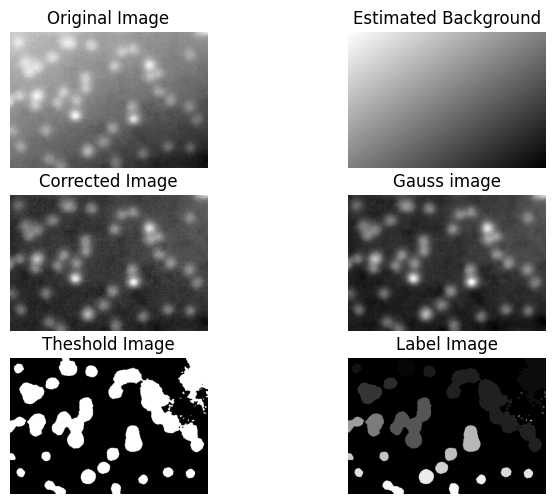

In [106]:
def create_gradient_array(rows, cols, start=1, end=0):
    x = np.linspace(start, end, cols)
    y = np.linspace(start, end, rows)
    xv, yv = np.meshgrid(x, y)

    gradient_array = (xv + yv) / 2.0

    return gradient_array

image_array = np.asarray(image)

rows = image_array.shape[1]
cols = image_array.shape[2]

gradient_array = create_gradient_array(rows, cols, 40, 10)
corrected_image = image_array - gradient_array

image_gauss = np.asarray(dip.Gauss(dip.Image(corrected_image), sigmas=[2]))

image_thres = np.asarray(dip.IsodataThreshold(dip.Image(image_gauss)))

image_label = np.asarray(dip.Label(dip.Image(image_thres)))

fig, ax = plt.subplots(3, 2, figsize=(8, 6))
ax[0,0].imshow(image_array[0], cmap='gray')
ax[0,0].set_title('Original Image')
ax[0,0].axis('off')

ax[0,1].imshow(gradient_array, cmap='gray')
ax[0,1].set_title('Estimated Background')
ax[0,1].axis('off')

ax[1,0].imshow(corrected_image[0], cmap='gray')
ax[1,0].set_title('Corrected Image')
ax[1,0].axis('off')

ax[1,1].imshow(image_gauss, cmap='gray')
ax[1,1].set_title('Gauss image')
ax[1,1].axis('off')

ax[2,0].imshow(image_thres, cmap='gray')
ax[2,0].set_title('Theshold Image')
ax[2,0].axis('off')

ax[2,1].imshow(image_label, cmap='gray')
ax[2,1].set_title('Label Image')
ax[2,1].axis('off')

plt.show()


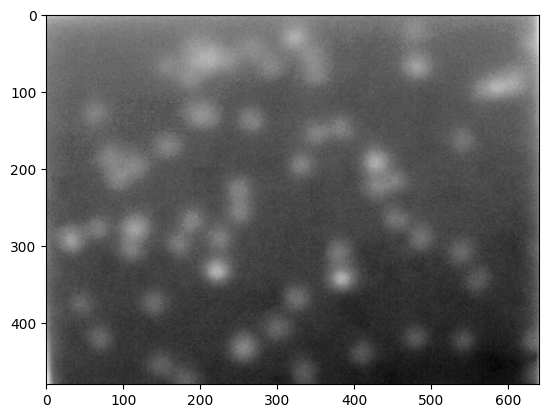

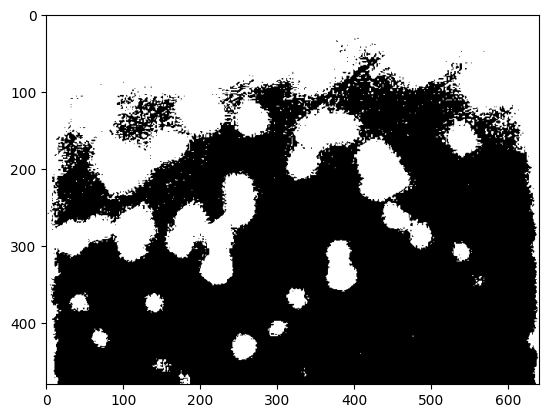

In [67]:
image = dip.Image(corrected_image)

def show(img):
    plt.figure()
    plt.imshow(np.array(img), cmap='gray')
    plt.show()

show(image)
show(dip.IsodataThreshold(image))